<a href="https://colab.research.google.com/github/sophiawhe/data-visualization/blob/main/605_662DataVisualization_p4_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud

In [2]:
# imports
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from ipywidgets import widgets, interact, interactive, fixed

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load dataframe
df = pd.read_csv("vaccination_all_tweets.csv", index_col=0)
# looking at first 5 rows of the dataset
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
id,,,,,,,,,,,,,,,
1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
print("There are ",len(df.user_location.unique())," user locations in this dataset such as", df.user_location.unique()[0:4])


There are 212982 observations and 15 features in this dataset. 

There are  24221  user locations in this dataset such as ['La Crescenta-Montrose, CA' 'San Francisco, CA' 'Your Bed'
 'Vancouver, BC - Canada']


In [5]:
df[["user_location", "text"]].head()

,user_location,text
id,,
1340539111971516416,"La Crescenta-Montrose, CA",Same folks said daikon paste could treat a cyt...
1338158543359250433,"San Francisco, CA",While the world has been on the wrong side of ...
1337858199140118533,Your Bed,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
1337855739918835717,"Vancouver, BC - Canada","Facts are immutable, Senator, even when you're..."
1337854064604966912,NaN,Explain to me again why we need a vaccine @Bor...


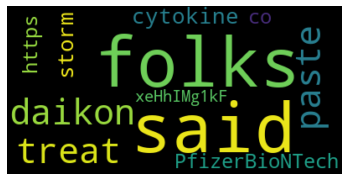

In [6]:
# start with first tweet
text = df.text.iloc[0]

# create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

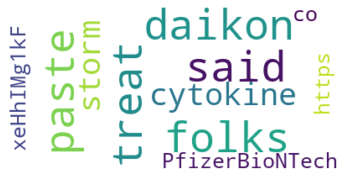

In [7]:
# lower max_font_size, change the maximum number of word and lighten the background
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
text = " ".join(review for review in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))
text = text.lower()

There are 26755193 words in the combination of all review.


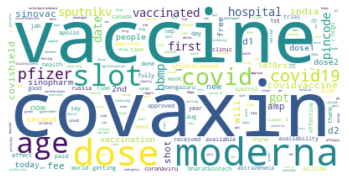

In [9]:
# stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "co"])

# generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# display the generated image using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
def makingclouds(category,maximum,atitle):
  text = " ".join(review for review in df.text)
  print ("There are {} words in the combination of all review.".format(len(text)))
  text = text.lower()
  wordcloud = WordCloud(background_color="white",max_words=maximum,collocations=False).generate(text)
  if category == "stopwords":
    stopwords = set(STOPWORDS)
    stopwords.update(["https", "co"])
    wordcloud = WordCloud(stopwords=stopwords,max_words=maximum, background_color="white",collocations=False).generate(text)

  wordcloud.to_file("wordcloud.png")
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(atitle, fontsize=30)
  plt.show()

interact(makingclouds, category=['no_stopwords', 'stopwords'], df=fixed(df),maximum=[20,50,100,150],
         atitle=fixed('Most frequent words in COVID-19 Tweets'))

interactive(children=(Dropdown(description='category', options=('no_stopwords', 'stopwords'), value='no_stopwo…

<function __main__.makingclouds>